In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Генернируем данные

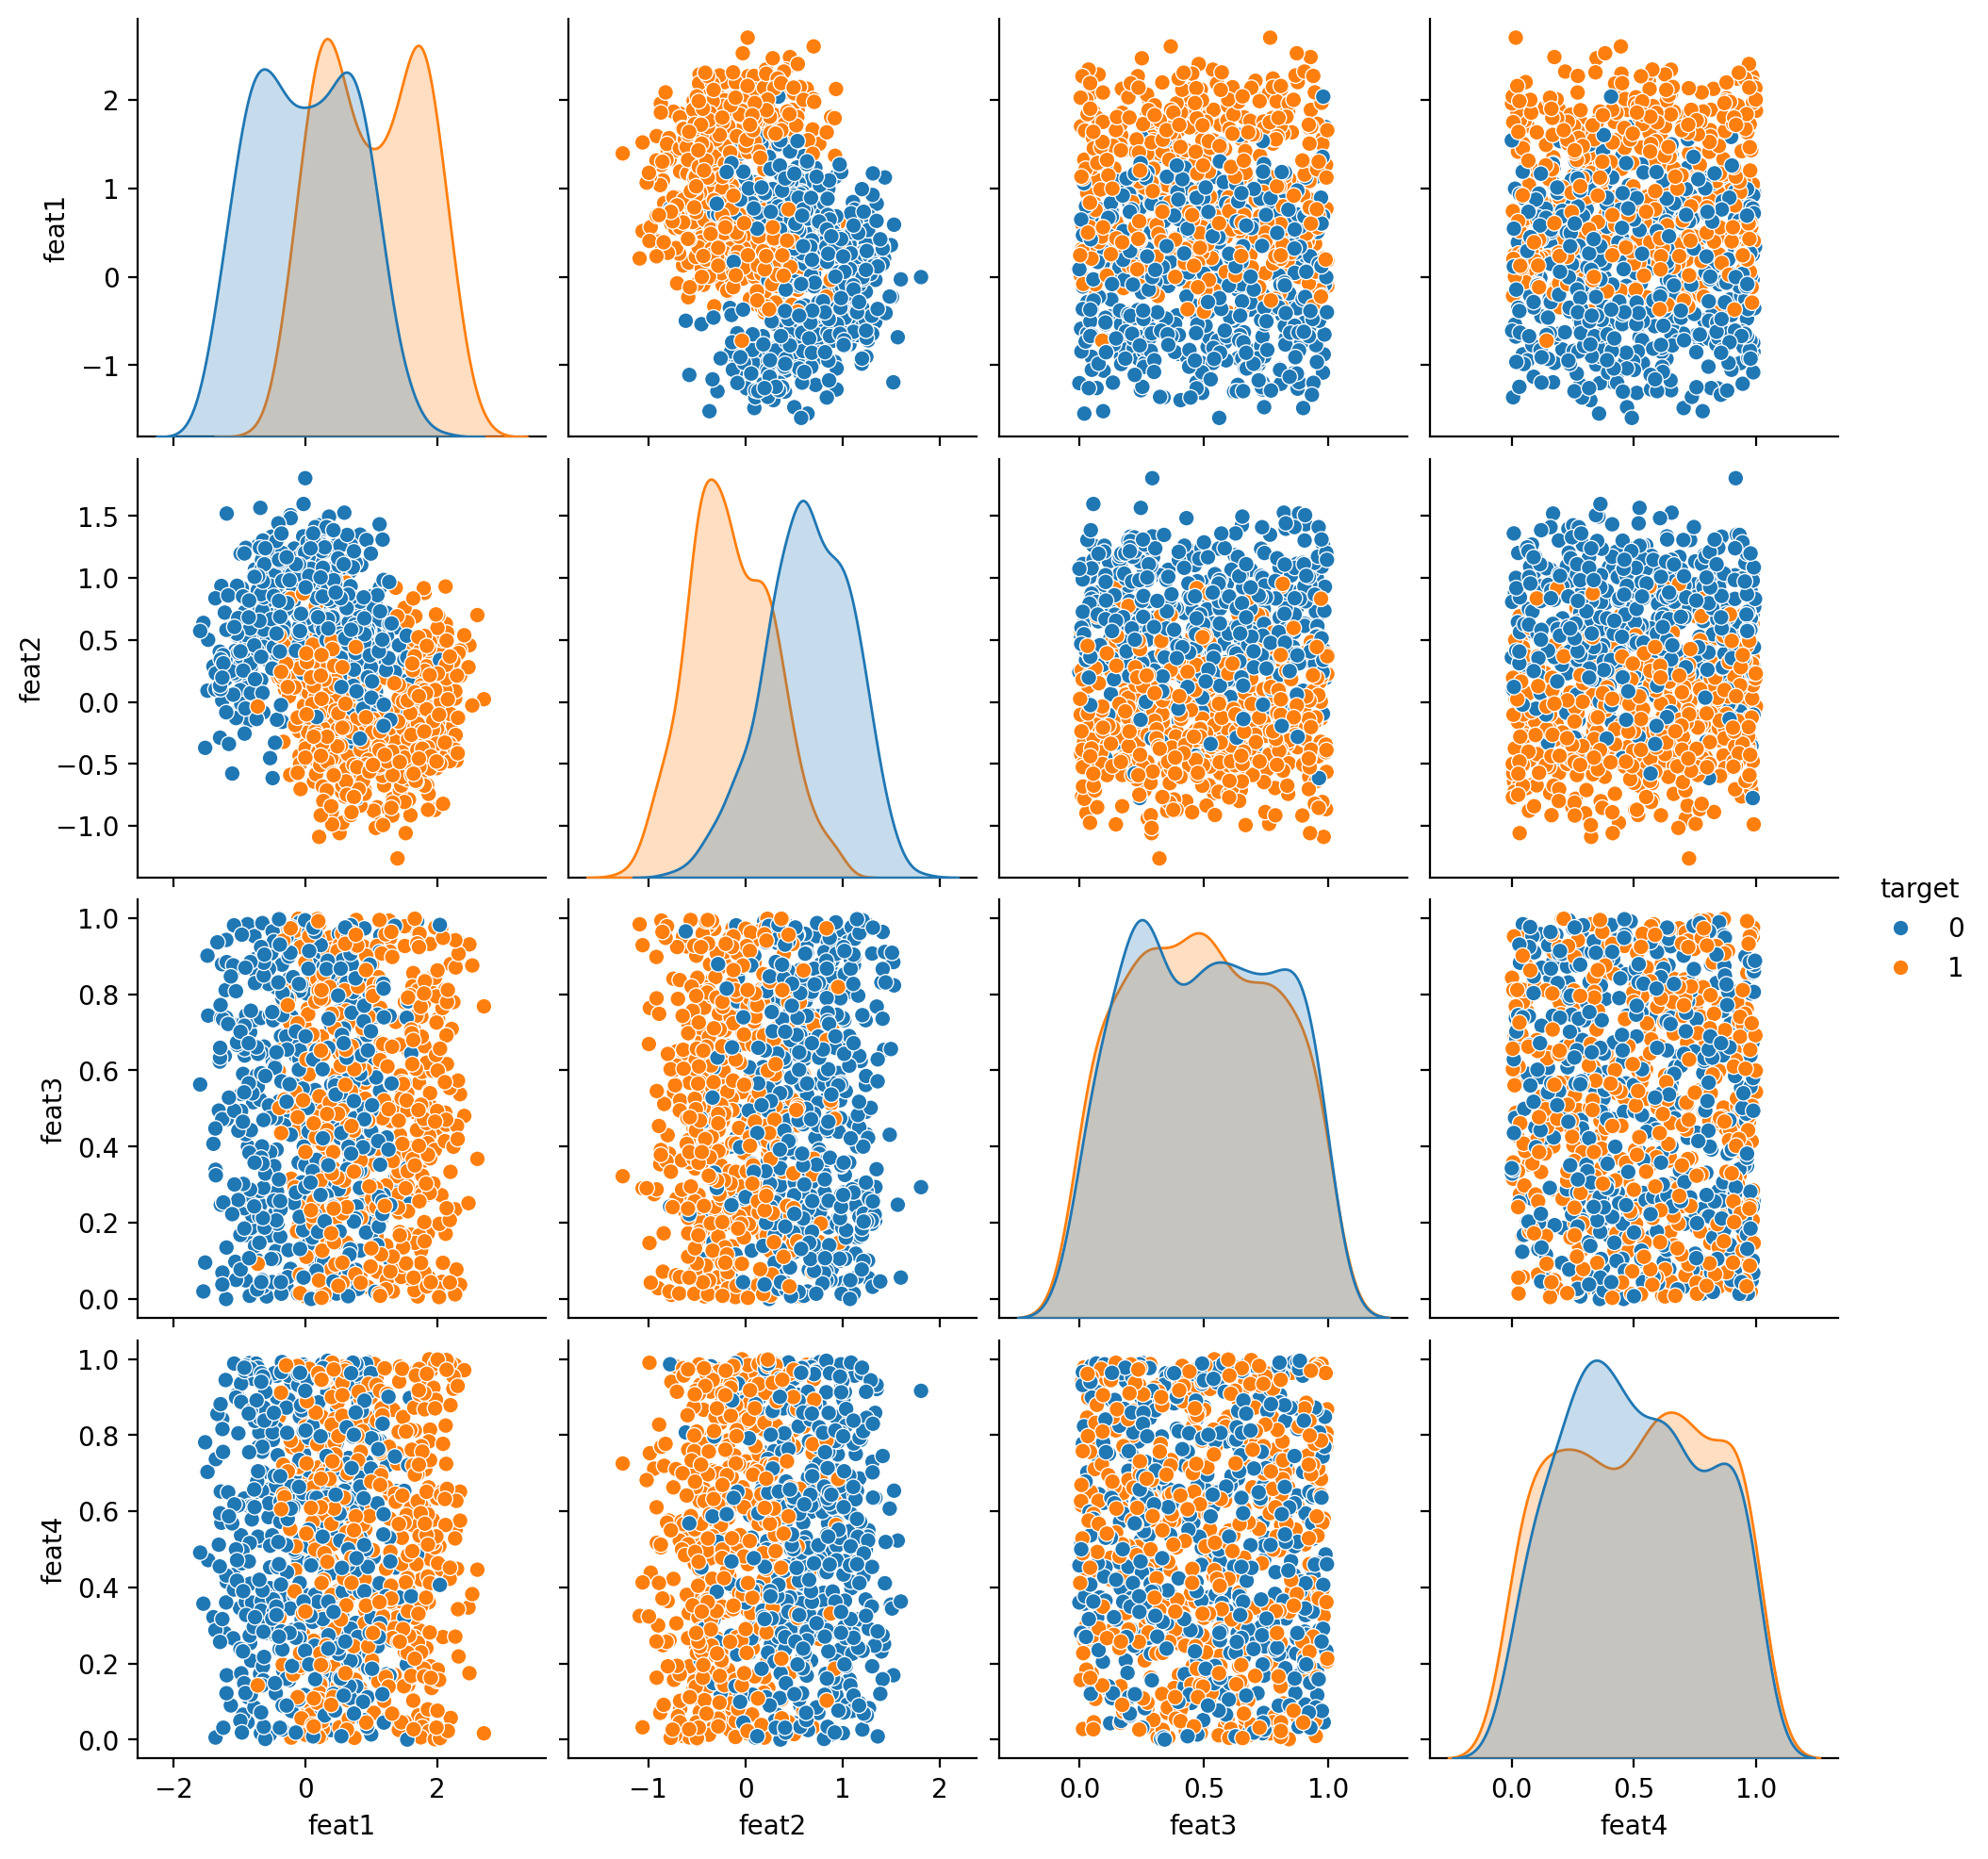

In [2]:
X, y = make_moons(n_samples=1_000, random_state=0, noise=0.3)

df = pd.DataFrame({
    'feat1': X[:, 0],
    'feat2': X[:, 1],
    'feat3': np.random.rand(X.shape[0]),
    'feat4': np.random.rand(X.shape[0]),
    'target': y
})

sns.pairplot(df, hue='target')

## Сравнение доступных алгоритмов

In [3]:
from pycaret.classification import setup, compare_models, tune_model, evaluate_model, create_model
from dask.distributed import Client
from pycaret.parallel import FugueBackend

In [4]:
s = setup(
  data=df, 
  target='target',
  n_jobs=1
)

,Description,Value
0,Session id,5625
1,Target,target
2,Target type,Binary
3,Original data shape,"(1000, 5)"
4,Transformed data shape,"(1000, 5)"
5,Transformed train set shape,"(700, 5)"
6,Transformed test set shape,"(300, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [5]:
dask_client = Client()

In [6]:
%%time
best = compare_models(
  parallel=FugueBackend(dask_client)  
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9171,0.9629,0.9171,0.9184,0.9170,0.8343,0.8356,0.092
rf,Random Forest Classifier,0.9143,0.9553,0.9143,0.9159,0.9136,0.8286,0.8312,0.088
lightgbm,Light Gradient Boosting Machine,0.9086,0.9554,0.9171,0.9043,0.9091,0.8171,0.8202,0.043
knn,K Neighbors Classifier,0.9086,0.9512,0.9171,0.9030,0.9090,0.8171,0.8191,0.011
ada,Ada Boost Classifier,0.9071,0.9581,0.9057,0.9085,0.9066,0.8143,0.8151,0.061
et,Extra Trees Classifier,0.9057,0.9598,0.9029,0.9091,0.9044,0.8114,0.8139,0.098
dt,Decision Tree Classifier,0.8714,0.8714,0.8629,0.8822,0.8703,0.7429,0.7462,0.010
nb,Naive Bayes,0.8457,0.9348,0.8371,0.8511,0.8430,0.6914,0.6931,0.011
qda,Quadratic Discriminant Analysis,0.8457,0.9355,0.8371,0.8518,0.8433,0.6914,0.6934,0.015
lr,Logistic Regression,0.8443,0.9358,0.8400,0.8477,0.8428,0.6886,0.6904,0.012


CPU times: user 220 ms, sys: 15.9 ms, total: 236 ms
Wall time: 8.66 s


In [7]:
dask_client

<Client: 'tcp://172.21.0.6:8786' processes=3 threads=24, memory=6.00 GiB>